## Work
1. 請嘗試將 preproc_x 替換成以每筆資料的 min/max 進行標準化至 -1 ~ 1 間，再進行訓練
2. 請嘗試將 mlp 疊更深 (e.g 5~10 層)，進行訓練後觀察 learning curve 的走勢
3. (optional) 請改用 GPU 進行訓練 (如果你有 GPU 的話)，比較使用 CPU 與 GPU 的訓練速度

In [2]:
## 
"""
Your code here (optional)
確認硬體資源
"""
!nvidia-smi

'nvidia-smi' 不是內部或外部命令、可執行的程式或批次檔。


In [3]:
import os
import keras
from sklearn.preprocessing import MaxAbsScaler
# 請嘗試設定 GPU：os.environ


Using TensorFlow backend.


In [4]:
train, test = keras.datasets.cifar10.load_data()

In [18]:
## 資料前處理
"""
Your code here
"""

def preproc_x(x,flatten=True):
    
    x = ((x-x.mean()) / (x.max()-x.min()))
    
    if flatten:
        x = x.reshape((len(x), -1))
        
    return x

def preproc_y(y,num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    
   

In [19]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [27]:
"""Code Here
建立你的神經網路
"""
def build_mlp(input_shape,output_units=10,num_neurons=[512,256,128,64,32,16,8]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units,activation='relu',name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units,activation='relu',name="hidden_layer"+str(i+1))(x)
            
    out = keras.layers.Dense(units=output_units,activation='softmax',name='output')(x)
    
    model = keras.models.Model(inputs=[input_layer],outputs=[out])
    
    return model
    



In [28]:
model = build_mlp(input_shape=x_train.shape[1:])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
hidden_layer4 (Dense)        (None, 64)                8256      
_________________________________________________________________
hidden_layer5 (Dense)        (None, 32)                2080      
_________________________________________________________________
hidden_layer6 (Dense)        (None, 16)                528       
__________

In [29]:
## 超參數設定
LEARNING_RATE = 0.001
EPOCHS = 100
BATCH_SIZE = 256

In [30]:
optimizer = keras.optimizers.Adam(lr=LEARNING_RATE)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

In [31]:
model.fit(x_train, y_train, 
          epochs=EPOCHS, 
          batch_size=BATCH_SIZE, 
          validation_data=(x_test, y_test), 
          shuffle=True)

Instructions for updating:
Use tf.cast instead.
Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 16s 325us/step - loss: 2.0289 - acc: 0.2670 - val_loss: 1.8233 - val_acc: 0.3424
Epoch 2/100
50000/50000 [==============================] - 9s 171us/step - loss: 1.6927 - acc: 0.4034 - val_loss: 1.6136 - val_acc: 0.4333
Epoch 3/100
50000/50000 [==============================] - 8s 170us/step - loss: 1.5165 - acc: 0.4664 - val_loss: 1.5200 - val_acc: 0.4697
Epoch 4/100
50000/50000 [==============================] - 9s 172us/step - loss: 1.3972 - acc: 0.5086 - val_loss: 1.4512 - val_acc: 0.4977
Epoch 5/100
50000/50000 [==============================] - 9s 171us/step - loss: 1.2971 - acc: 0.5436 - val_loss: 1.4040 - val_acc: 0.5099
Epoch 6/100
50000/50000 [==============================] - 9s 172us/step - loss: 1.2159 - acc: 0.5705 - val_loss: 1.4051 - val_acc: 0.5178
Epoch 7/100
50000/50000 [==============================] - 9s 173us

50000/50000 [==============================] - 9s 172us/step - loss: 0.1113 - acc: 0.9628 - val_loss: 3.6607 - val_acc: 0.5288
Epoch 58/100
50000/50000 [==============================] - 9s 171us/step - loss: 0.1050 - acc: 0.9652 - val_loss: 3.7081 - val_acc: 0.5268
Epoch 59/100
50000/50000 [==============================] - 9s 171us/step - loss: 0.1137 - acc: 0.9635 - val_loss: 3.5335 - val_acc: 0.5260
Epoch 60/100
50000/50000 [==============================] - 9s 171us/step - loss: 0.0802 - acc: 0.9736 - val_loss: 3.7833 - val_acc: 0.5266
Epoch 61/100
50000/50000 [==============================] - 9s 172us/step - loss: 0.1007 - acc: 0.9669 - val_loss: 3.7045 - val_acc: 0.5257
Epoch 62/100
50000/50000 [==============================] - 9s 172us/step - loss: 0.0878 - acc: 0.9708 - val_loss: 3.9004 - val_acc: 0.5312
Epoch 63/100
50000/50000 [==============================] - 9s 179us/step - loss: 0.1072 - acc: 0.9650 - val_loss: 3.7719 - val_acc: 0.5205
Epoch 64/100
50000/50000 [=======

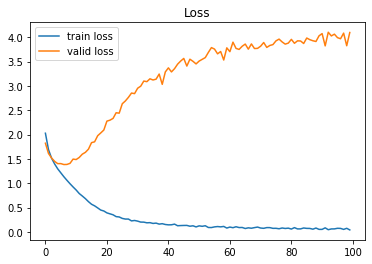

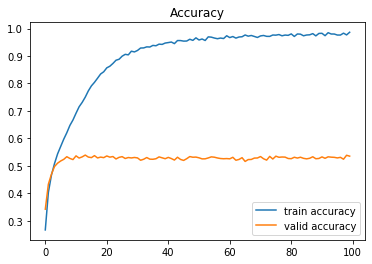

In [33]:
import matplotlib.pyplot as plt


train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["acc"]
valid_acc = model.history.history["val_acc"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()